PHÂN TÍCH DỮ LIỆU CỔ PHIẾU DỰA TRÊN MÃ SỐ SINH VIÊN

File vnstock_listing_companies.csv chứa thông tin các mã chứng khoán thông dụng
Thư mục transaction chứa lịch sử biến động giá cổ phiếu trong năm 2024 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Đọc và hiển thị các thông tin từ file vnstock_listing_companies.csv
df = pd.read_csv("vnstock_listing_companies.csv")
print(df.head())
print(df.info())
print(df.describe())


  ticker exchange            shortName industry industryEn  establishedYear  \
0    DHT      HNX     Dược phẩm Hà Tây   Bán lẻ     Retail           2001.0   
1    DGW     HOSE          Thế Giới Số   Bán lẻ     Retail           2003.0   
2    TTH      HNX  TM và DV Tiến Thành   Bán lẻ     Retail           2003.0   
3    MWG     HOSE     Thế giới di động   Bán lẻ     Retail           2004.0   
4    PIT     HOSE       XNK PETROLIMEX   Bán lẻ     Retail           2004.0   

   noEmployees  noShareholders  foreignPercent                     website  \
0        795.0           749.0           0.271  http://www.hataphar.com.vn   
1        612.0          1228.0           0.259    https://digiworld.com.vn   
2         21.0          1452.0           0.003  http://www.tienthanhjsc.vn   
3      40756.0         20628.0           0.490           http://www.mwg.vn   
4        215.0          1607.0           0.008     http://www.pitco.com.vn   

   stockRating  outstandingShare  issueShare companyType

In [3]:
# In danh sách các cột
print("Danh sách các cột: ",df.columns)
# In số dòng
print("Số dòng:", df.shape[0])

Danh sách các cột:  Index(['ticker', 'exchange', 'shortName', 'industry', 'industryEn',
       'establishedYear', 'noEmployees', 'noShareholders', 'foreignPercent',
       'website', 'stockRating', 'outstandingShare', 'issueShare',
       'companyType', 'monthlyRecords', 'file_monthly_datas'],
      dtype='object')
Số dòng: 796


In [4]:
# Viết hàm find_stock để tìm mã số cổ phiếu X dựa vào mã số sinh viên (MSSV) theo quy tắc: Lấy 4 số cuối trong MSSV chia lấy dư cho 1000, kết quả nhận được là số thứ tự của mã chứng khoán X trong file vnstock_listing_companies.csv đính kèm
def find_stock(mssv):
    x = int(mssv[-4:])
    kq = x%1000
    return df.iloc[kq]["ticker"]
# Thực thi hàm find_stock với mã số sinh viên của bản thân để lấy kết quả của mã X và in ra màn hình 
ma_cp = find_stock("030238220024")
print("Mã cổ phiếu:", ma_cp)

Mã cổ phiếu: AIC


In [5]:
# Viết hàm ticker_detail in ra màn hình thông tin của một mã cổ phiếu bất kỳ từ file vnstock_listing_companies.csv. Các thông tin cần xuất ra màn hình là: ticker (Mã cổ phiếu), shortName (Tên cổ phiếu), monthlyRecords (nơi lưu trữ lịch sử giao dịch) 
def ticker_detail(macophieu):
    print(df.loc[df.ticker == macophieu,["ticker","shortName","monthlyRecords"]])
# Thực thi hàm ticker_detail với mã cổ phiếu X ở câu 2 
ticker_detail(ma_cp)

   ticker            shortName monthlyRecords
24    AIC  Bảo hiểm Hàng không        AIC.csv


In [6]:
# Thực hiện thống kê số lần phát sinh giao dịch, giá Close trung bình, giá Close cao nhất, giá Close thấp nhất của cổ phiếu X trong khoảng thời gian từ tháng 2 đến hết tháng 3 năm 2024.
cp_AIC = pd.read_csv(f"transaction/{ma_cp}.csv")
cp_AIC.time = pd.to_datetime(cp_AIC.time)
df1 =cp_AIC[(cp_AIC["time"].dt.month == 2) | (cp_AIC["time"].dt.month ==3)]
print("số lần phát sinh giao dịch:", df1.time.count())
print("Giá close thấp nhất:", np.min(df1.close))
print("Giá close cao nhất:", np.max(df1.close))
print("Giá close trung bình:", np.mean(df1.close))

số lần phát sinh giao dịch: 32
Giá close thấp nhất: 12800
Giá close cao nhất: 15200
Giá close trung bình: 13646.875


In [7]:
#Từ lịch sử giao dịch trên, thêm cột Info01 cho biết giá Close mỗi ngày là lớn hơn (giá trị 1), nhỏ hơn (giá trị -1), bằng (giá trị 0), so với giá Open của ngày đó.
df1 = cp_AIC[(cp_AIC["time"].dt.month == 2) | (cp_AIC["time"].dt.month ==3)].copy()
df1.loc[:,"Info01"] = 1
df1.loc[df1["close"] < df1["open"], "Info01"] = -1
df1.loc[df1["close"] == df1["open"], "Info01"] = 0
df1.head()

,time,open,high,low,close,volume,ticker,Info01
22,2024-02-01,15700,15700,14400,15200,2700,AIC,-1
23,2024-02-02,14600,14600,14600,14600,2400,AIC,0
24,2024-02-05,14600,14600,14000,14600,2800,AIC,0
25,2024-02-06,14000,14400,13000,14400,2500,AIC,1
26,2024-02-07,14700,14800,14200,14200,2500,AIC,-1


In [8]:
# Từ lịch sử giao dịch trên, tạo thêm cột Info02 cho biết giá Close mỗi giao dịch là tăng (giá trị 1), giảm (giá trị -1), bằng (giá trị 0), so với giá Close của lần giao dịch trước đó
df1.loc[:,"close_diff"] = df1["close"] - df1["close"].shift(1)
def info2_diff(diff):
    if diff>0:
        return 1
    elif diff<0:
        return -1
    else:
        return 0
df1.loc[:,"Info02"] = df1["close_diff"].apply(info2_diff)
df1 = df1.drop(labels = "close_diff", axis = 1)
df1.head()

,time,open,high,low,close,volume,ticker,Info01,Info02
22,2024-02-01,15700,15700,14400,15200,2700,AIC,-1,0
23,2024-02-02,14600,14600,14600,14600,2400,AIC,0,-1
24,2024-02-05,14600,14600,14000,14600,2800,AIC,0,0
25,2024-02-06,14000,14400,13000,14400,2500,AIC,1,-1
26,2024-02-07,14700,14800,14200,14200,2500,AIC,-1,-1


In [9]:
# Lưu tất cả thông tin (bao gồm cả Info01 và Info02) ra file {X}_Stock.csv.
df1.to_csv("{ma_cp}_Stock.csv")

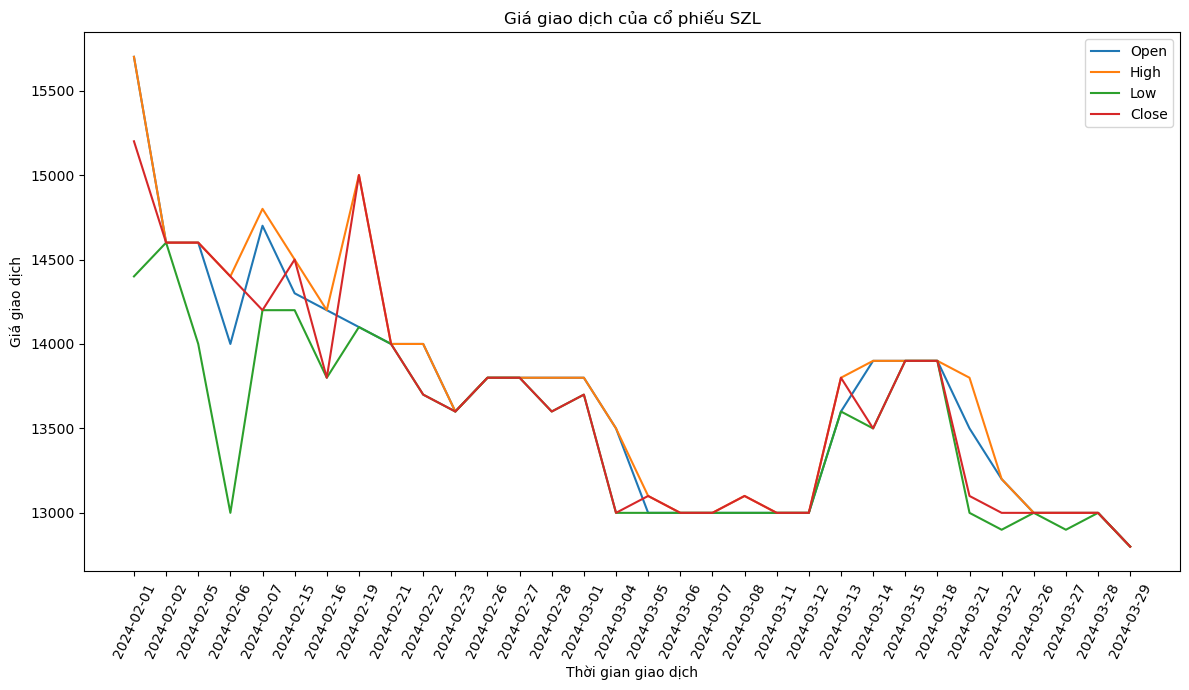

In [10]:
# Từ file X_Stock.csv trên, vẽ các đường [Open, High, Low, Close] của cổ phiếu X
AIC_Stock = pd.read_csv("{ma_cp}_Stock.csv")
plt.figure(figsize=(12, 7))
plt.plot(AIC_Stock["time"],AIC_Stock["open"], label = "Open")
plt.plot(AIC_Stock["time"],AIC_Stock["high"], label = "High")
plt.plot(AIC_Stock["time"],AIC_Stock["low"], label = "Low")
plt.plot(AIC_Stock["time"],AIC_Stock["close"], label = "Close")
plt.xticks(rotation = 65)
plt.xlabel("Thời gian giao dịch")
plt.ylabel("Giá giao dịch")
plt.title("Giá giao dịch của cổ phiếu SZL")
plt.legend()
plt.tight_layout()
plt.show()


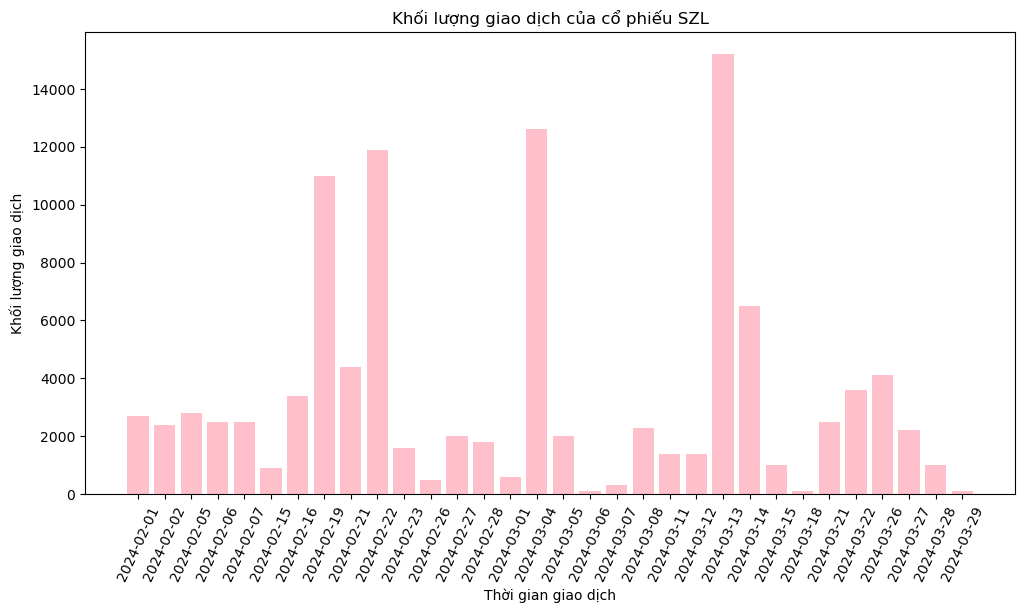

In [11]:
# Từ file X_Stock.csv trên, vẽ các biểu đồ dạng cột chứa thông tin Volume của cổ phiếu X.
plt.figure(figsize=(12, 6))
plt.bar(AIC_Stock["time"], AIC_Stock["volume"], color = "pink")
plt.xlabel("Thời gian giao dịch")
plt.ylabel("Khối lượng giao dịch")
plt.xticks(rotation = 65)
plt.title("Khối lượng giao dịch của cổ phiếu SZL")
plt.show()

In [12]:
# Từ file X_Stock.csv trên, xây dựng mô hình hồi quy tuyến tính diễn tả sự phụ thuộc của giá Close với Volume của cổ phiếu X.
X = AIC_Stock[["volume"]]
y = AIC_Stock["close"]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 101)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Chặn (Intercept):", lm.intercept_)
print("Hệ số (slope):", lm.coef_[0])

Chặn (Intercept): 13639.663673218043
Hệ số (slope): 0.0012983014317237147


In [15]:
# Dựa vào mô hình vừa xây dựng ở bước trên, nhập 10 giá trị Volume bất kì và đưa ra dự đoán giá Close tương ứng. 
Volume_values = pd.DataFrame(data= {"volume" : [300,1000,10000,17000,4700,6800,1380,3900,12578,786]})
close_pre = lm.predict(Volume_values)
Volume_values["Giá close dự đoán"]= close_pre.reshape(-1,1)
print(Volume_values)


   volume  Giá close dự đoán
0     300       13640.053164
1    1000       13640.961975
2   10000       13652.646688
3   17000       13661.734798
4    4700       13645.765690
5    6800       13648.492123
6    1380       13641.455329
7    3900       13644.727049
8   12578       13655.993709
9     786       13640.684138
